# Домашняя работа №1 (Никита Карпов, группа 212): аналитика зарплат

Загружаем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import plotly.graph_objects as go
import plotly.express as px

Загружаем датасет:

In [2]:
df_all_variables = pd.read_csv("Levels_Fyi_Salary_Data.csv")

Выбираем интересные нам атрибуты данных:

In [3]:
df = df_all_variables[["timestamp", 
                      "company", 
                      "title", 
                      "totalyearlycompensation", 
                      "location", 
                      "yearsofexperience", 
                      "Race", 
                      "Education"]]

Корректируем названия столбцов:

In [4]:
df = df.rename(columns = {"timestamp": "date", "totalyearlycompensation": "salary", "yearsofexperience": "experience", "Race": "race", "Education": "education"})

Оставляем только год и месяц:

In [5]:
df["date"] = pd.to_datetime(df["date"], dayfirst = False).dt.to_period('M')

Смотрим на данные:

In [6]:
df.head()

,date,company,title,salary,location,experience,race,education
0,2017-06,Oracle,Product Manager,127000,"Redwood City, CA",1.5,NaN,NaN
1,2017-06,eBay,Software Engineer,100000,"San Francisco, CA",5.0,NaN,NaN
2,2017-06,Amazon,Product Manager,310000,"Seattle, WA",8.0,NaN,NaN
3,2017-06,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,NaN,NaN
4,2017-06,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,NaN,NaN


Изучаем кол-во непустых значений в столбцах, типы столбцов:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   date        62642 non-null  period[M]
 1   company     62637 non-null  object   
 2   title       62642 non-null  object   
 3   salary      62642 non-null  int64    
 4   location    62642 non-null  object   
 5   experience  62642 non-null  float64  
 6   race        22427 non-null  object   
 7   education   30370 non-null  object   
dtypes: float64(1), int64(1), object(5), period[M](1)
memory usage: 3.8+ MB


Изучаем средние значения заработной платы и возраста, а также самые популярные значения (моду) номинальных переменных:

In [8]:
df.describe(include = "all")

,date,company,title,salary,location,experience,race,education
count,62642,62637,62642,6.264200e+04,62642,62642.000000,22427,30370
unique,51,1631,15,NaN,1050,NaN,5,5
top,2021-07,Amazon,Software Engineer,NaN,"Seattle, WA",NaN,Asian,Master's Degree
freq,3463,8126,41231,NaN,8701,NaN,11772,15391
mean,NaN,NaN,NaN,2.163004e+05,NaN,7.204135,NaN,NaN
std,NaN,NaN,NaN,1.380337e+05,NaN,5.840375,NaN,NaN
min,NaN,NaN,NaN,1.000000e+04,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.350000e+05,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,1.880000e+05,NaN,6.000000,NaN,NaN
75%,NaN,NaN,NaN,2.640000e+05,NaN,10.000000,NaN,NaN


Изучаем медианные (независимые от выбросов) значения зарплаты и возраста:

In [9]:
df["salary"].median()

188000.0

In [10]:
df["experience"].median()

6.0

Изучаем самые распространенные компании, профессии, локации и пр.:

In [11]:
df["company"].value_counts()

Amazon                      8126
Microsoft                   5216
Google                      4330
Facebook                    2990
Apple                       2028
                            ... 
Samsung research America       1
Bny Mellon                     1
yelp                           1
Bloomberg lp                   1
tableau software               1
Name: company, Length: 1631, dtype: int64

In [12]:
df["title"].value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

In [13]:
df["location"].value_counts()

Seattle, WA                      8701
San Francisco, CA                6797
New York, NY                     4562
Redmond, WA                      2649
Mountain View, CA                2275
                                 ... 
San Fernando, LB, Philippines       1
Suwanee, GA                         1
Oxford, MS                          1
Wayne, PA                           1
Hilbert, WI                         1
Name: location, Length: 1050, dtype: int64

<AxesSubplot:>

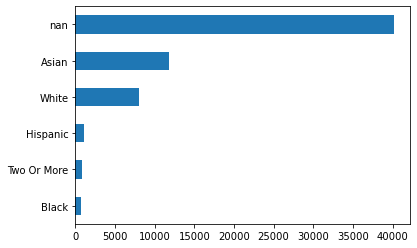

In [14]:
df["race"].value_counts(ascending = True, dropna = False).plot(kind='barh')

<AxesSubplot:>

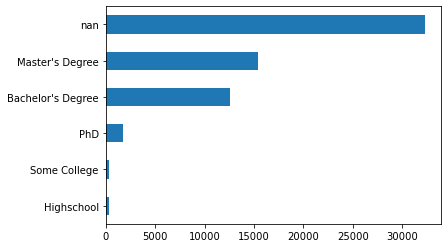

In [15]:
df["education"].value_counts(ascending = True, dropna = False).plot(kind='barh')

Анализируем распределение заработной платы (в пределах 1 млн долл.) и возраста:

<AxesSubplot:>

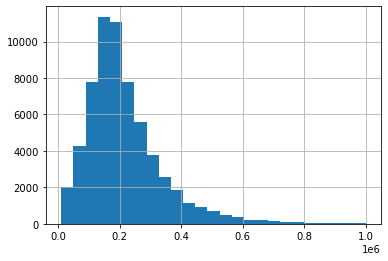

In [16]:
df[df["salary"] <= 1000000]["salary"].hist(bins = 25)

<AxesSubplot:>

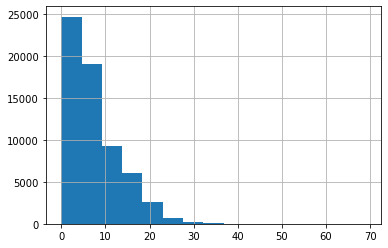

In [17]:
df["experience"].hist(bins = 15)

Сортируем различные категории (раса, образование и пр.) с минимальной и максимальной средней заработной платы:

<AxesSubplot:ylabel='race'>

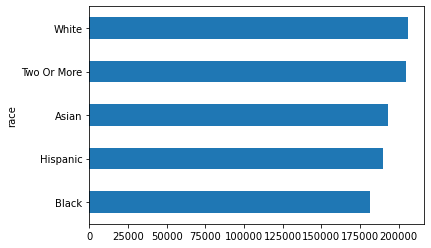

In [18]:
df.groupby("race")["salary"].mean().sort_values().plot(kind = "barh")

In [19]:
df.groupby("race")["salary"].std().sort_values(ascending = False)

race
Asian          136263.724777
White          132138.336330
Black          129440.053882
Two Or More    127166.370506
Hispanic       106816.424712
Name: salary, dtype: float64

<AxesSubplot:ylabel='education'>

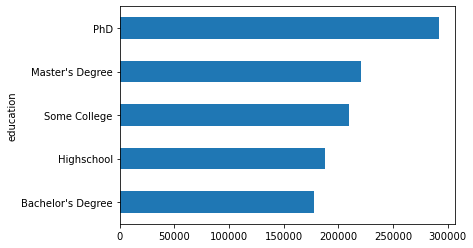

In [20]:
df.groupby("education")["salary"].mean().sort_values().plot(kind = "barh")

In [21]:
df.groupby("education")["salary"].std().sort_values(ascending = False)

education
PhD                  150201.764434
Master's Degree      138376.175034
Some College         129397.405989
Highschool           121207.623723
Bachelor's Degree    117969.030391
Name: salary, dtype: float64

In [22]:
df.groupby("company")["salary"].mean().nlargest(10)

company
Coupa software    1.483000e+06
Cloudkitchens     7.000000e+05
amplitude         6.800000e+05
Doordash          5.935000e+05
synaptics         5.390000e+05
zillow group      5.200000e+05
UBER              5.066667e+05
PDT Partners      5.000000e+05
snapchat          4.850000e+05
Netflix           4.813769e+05
Name: salary, dtype: float64

In [23]:
df.groupby("company")["salary"].mean().nsmallest(10)

company
ZS associates                10000.000000
Bukalapak                    12600.000000
TATA Consultancy Services    13000.000000
Nice                         14000.000000
verkada                      15000.000000
Andela                       15647.058824
Zoho                         16538.461538
siemens                      18000.000000
Browserstack                 19000.000000
AthenaHealth                 23000.000000
Name: salary, dtype: float64

In [24]:
df.groupby("title")["salary"].mean().sort_values(ascending = False)

title
Software Engineering Manager    354635.752312
Product Manager                 257813.396105
Technical Program Manager       237099.927589
Sales                           214273.318872
Hardware Engineer               213655.000000
Solution Architect              212736.387208
Product Designer                207637.203166
Software Engineer               205403.992287
Data Scientist                  203656.710628
Marketing                       198971.830986
Human Resources                 178711.538462
Management Consultant           162795.081967
Mechanical Engineer             158442.857143
Recruiter                       155580.931264
Business Analyst                129727.683616
Name: salary, dtype: float64

In [25]:
df.groupby("title")["salary"].std().sort_values(ascending = False)

title
Software Engineering Manager    228501.760401
Product Manager                 182258.214578
Sales                           128206.131253
Software Engineer               122044.294739
Marketing                       115845.414218
Product Designer                109739.200170
Data Scientist                  109504.643967
Hardware Engineer               108318.822574
Technical Program Manager       108235.251732
Human Resources                 101163.325811
Management Consultant            98473.607118
Solution Architect               96308.735272
Mechanical Engineer              87963.611411
Recruiter                        69747.350344
Business Analyst                 67271.511823
Name: salary, dtype: float64

In [26]:
df.groupby("location")["salary"].mean().nlargest(10)

location
Aspen, CO                               650000.000000
Chapel Hill, NC                         605000.000000
San Mateo, FL                           486000.000000
Highland Park, NJ                       480000.000000
Los Gatos, CA                           479185.840708
Wimborne Minster, EN, United Kingdom    444000.000000
Los Altos, CA                           436000.000000
Londonderry, OH                         405000.000000
Nazareth Illit, HZ, Israel              390000.000000
Sammamish, WA                           388000.000000
Name: salary, dtype: float64

In [27]:
df.groupby("location")["salary"].mean().nsmallest(10)

location
Dhaka, DA, Bangladesh         10000.0
Gandhinagar, GJ, India        10000.0
Goa, GA, India                10000.0
Tashkent, TO, Uzbekistan      10000.0
Cochin, KL, India             13000.0
Trivandrum, KL, India         13200.0
Florianopolis, SC, Brazil     15000.0
Moscow Mills, MO              15000.0
Yangon, YA, Burma             15000.0
Johor Baharu, JH, Malaysia    16000.0
Name: salary, dtype: float64

Строим IQR для уровня зп и на его основе (в дальнейшем) исключаем выбросы:

In [28]:
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
iqr = q3 - q1

In [29]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-58500.0
457500.0


In [30]:
df_no_outliers = df[df["salary"] <= iqr_outlier_threshold_up]

Смотрим на компании, профессии и пр. категории с максимальным количеством анамально высоких зп:

In [31]:
df[df["salary"] > iqr_outlier_threshold_up]["company"].value_counts().nlargest(5)

Facebook    540
Google      405
Amazon      322
Apple       144
Netflix     141
Name: company, dtype: int64

In [32]:
df[df["salary"] > iqr_outlier_threshold_up]["title"].value_counts().nlargest(5)

Software Engineer               1587
Software Engineering Manager     800
Product Manager                  395
Data Scientist                    84
Hardware Engineer                 77
Name: title, dtype: int64

In [33]:
df[df["salary"] > iqr_outlier_threshold_up]["location"].value_counts().nlargest(5)

San Francisco, CA    746
Seattle, WA          533
Menlo Park, CA       302
Mountain View, CA    238
New York, NY         202
Name: location, dtype: int64

In [34]:
df[df["salary"] > iqr_outlier_threshold_up]["race"].value_counts().nlargest(5)

Asian          391
White          381
Two Or More     36
Hispanic        34
Black           18
Name: race, dtype: int64

In [35]:
df[df["salary"] > iqr_outlier_threshold_up]["education"].value_counts().nlargest(5)

Master's Degree      707
Bachelor's Degree    354
PhD                  203
Some College          19
Highschool            13
Name: education, dtype: int64

Анализируем взаимосвязь между опытом и зп:

In [36]:
mean_salary_by_company = df_no_outliers.groupby("company")["salary"].mean()

In [37]:
mean_experience_by_company = df_no_outliers.groupby("company")["experience"].mean()

In [38]:
mean_salary_by_company.corr(mean_experience_by_company)

0.2386614350154061

In [39]:
df_by_company = pd.concat([mean_salary_by_company, mean_experience_by_company], axis=1)

<AxesSubplot:xlabel='experience', ylabel='salary'>

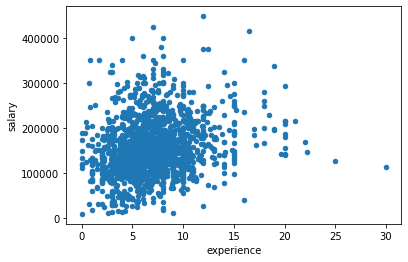

In [40]:
df_by_company.plot("experience", "salary", kind = 'scatter')

Исследуем зп в динамике:

<AxesSubplot:title={'center':'Average salary by month'}, xlabel='date'>

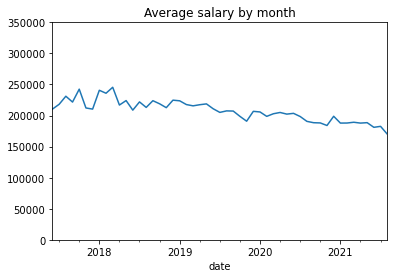

In [41]:
df_no_outliers.groupby("date")["salary"].mean().plot(title = "Average salary by month", ylim = (0, 350000))

<AxesSubplot:title={'center':'Amazon'}, xlabel='date'>

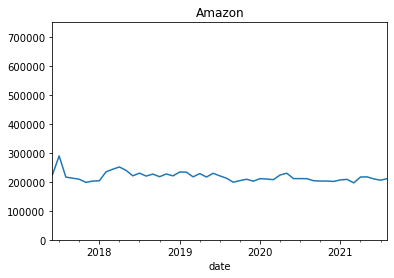

In [42]:
df_no_outliers[df_no_outliers["company"] == "Amazon"].groupby("date")['salary'].mean().plot(title = "Amazon", ylim = (0, 750000))

<AxesSubplot:title={'center':'Microsoft'}, xlabel='date'>

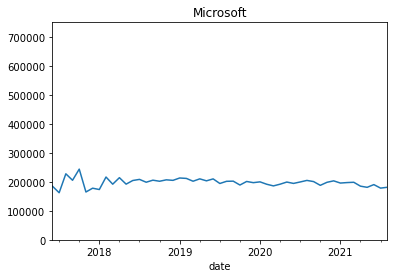

In [43]:
df_no_outliers[df_no_outliers["company"] == "Microsoft"].groupby("date")['salary'].mean().plot(title = "Microsoft", ylim = (0, 750000))

<AxesSubplot:title={'center':'Google'}, xlabel='date'>

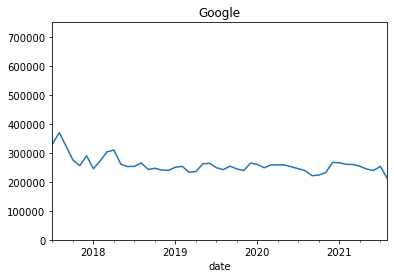

In [44]:
df_no_outliers[df_no_outliers["company"] == "Google"].groupby("date")['salary'].mean().plot(title = "Google", ylim = (0, 750000))

<AxesSubplot:title={'center':'Facebook'}, xlabel='date'>

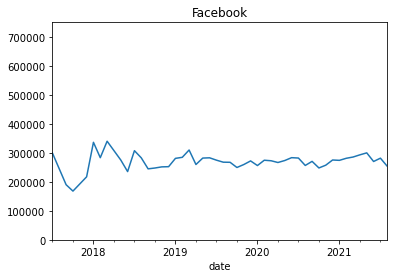

In [45]:
df_no_outliers[df_no_outliers["company"] == "Facebook"].groupby("date")["salary"].mean().plot(title = "Facebook", ylim = (0, 750000))

<AxesSubplot:title={'center':'Apple'}, xlabel='date'>

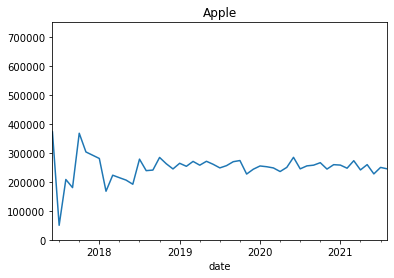

In [46]:
df_no_outliers[df_no_outliers["company"] == "Apple"].groupby("date")['salary'].mean().plot(title = "Apple", ylim = (0, 750000))

<AxesSubplot:title={'center':'Software Engineer'}, xlabel='date'>

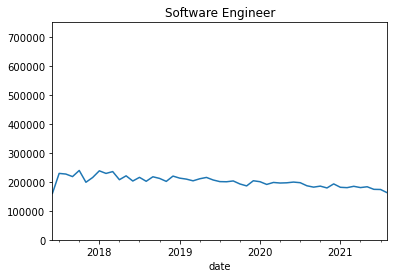

In [47]:
df_no_outliers[df_no_outliers["title"] == "Software Engineer"].groupby("date")["salary"].mean().plot(title = "Software Engineer", ylim = (0, 750000))

<AxesSubplot:title={'center':'Product Manager'}, xlabel='date'>

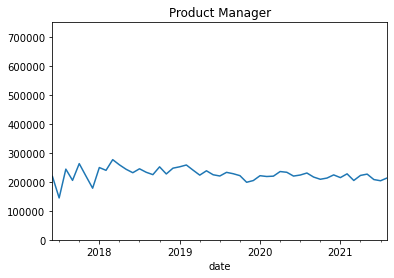

In [48]:
df_no_outliers[df_no_outliers["title"] == "Product Manager"].groupby("date")["salary"].mean().plot(title = "Product Manager", ylim = (0, 750000))

<AxesSubplot:title={'center':'Software Engineering Manager'}, xlabel='date'>

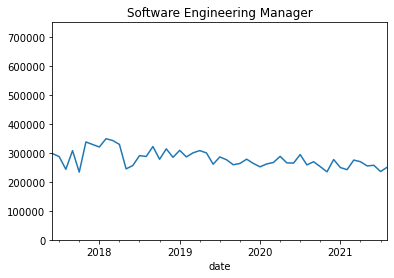

In [49]:
df_no_outliers[df_no_outliers["title"] == "Software Engineering Manager"].groupby("date")["salary"].mean().plot(title = "Software Engineering Manager", ylim = (0, 750000))

<AxesSubplot:title={'center':'Data Scientist'}, xlabel='date'>

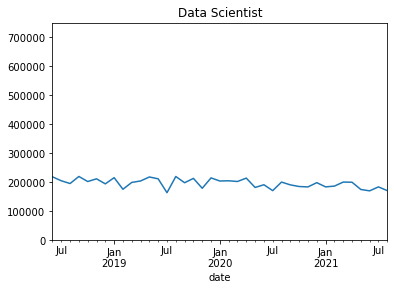

In [50]:
df_no_outliers[df_no_outliers["title"] == "Data Scientist"].groupby("date")["salary"].mean().plot(title = "Data Scientist", ylim = (0, 750000))

<AxesSubplot:title={'center':'Hardware Engineer'}, xlabel='date'>

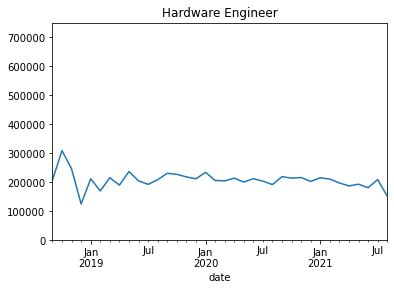

In [51]:
df_no_outliers[df_no_outliers["title"] == "Hardware Engineer"].groupby("date")["salary"].mean().plot(title = "Hardware Engineer", ylim = (0, 750000))

Исследуем распределение зп:

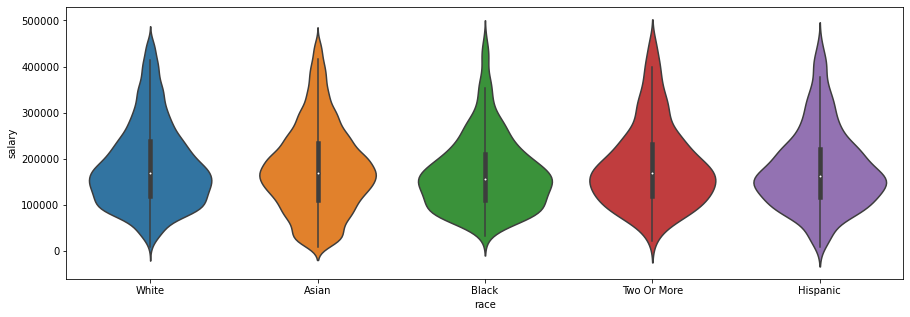

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x=df_no_outliers['race'], y=df_no_outliers['salary'])
plt.show()

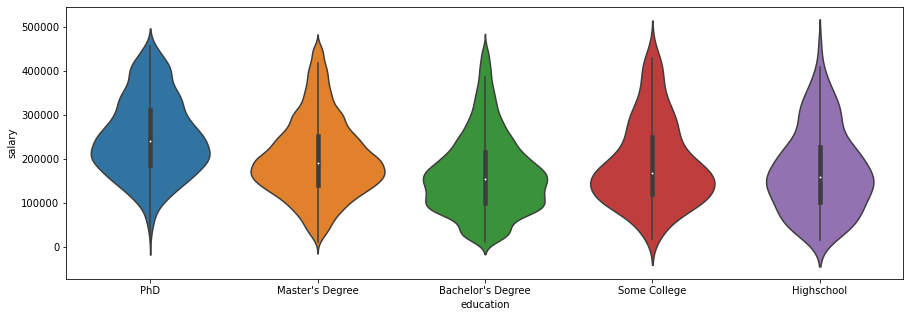

In [53]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x=df_no_outliers['education'], y=df_no_outliers['salary'])
plt.show()

In [54]:
df_no_outliers_top5_companies = df_no_outliers[df_no_outliers["company"].isin(["Amazon", "Microsoft", "Google", "Facebook", "Apple"])]

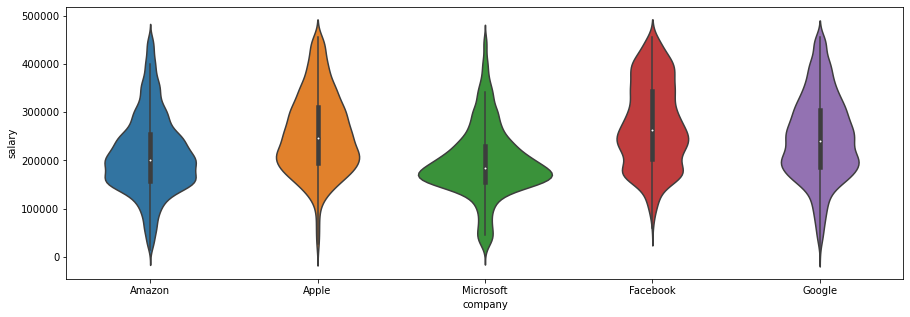

In [55]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x=df_no_outliers_top5_companies['company'], y=df_no_outliers_top5_companies['salary'])
plt.show()

In [56]:
df_no_outliers_top5_titles = df_no_outliers[df_no_outliers["title"].isin(["Software Engineer", "Product Manager", "Software Engineering Manager", "Data Scientist", "Hardware Engineer"])]

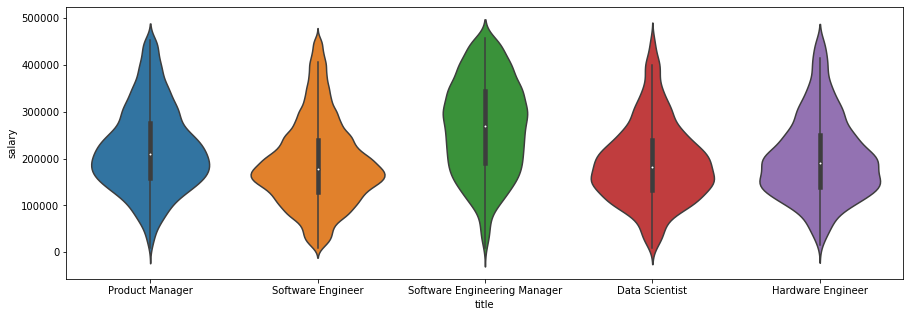

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(x=df_no_outliers_top5_titles['title'], y=df_no_outliers_top5_titles['salary'])
plt.show()